# PCA vs. KPCA: Concentric Circles and Two Moons

## Concentric Circles Data

Text(0.5, 1.0, 'KPCA Result')

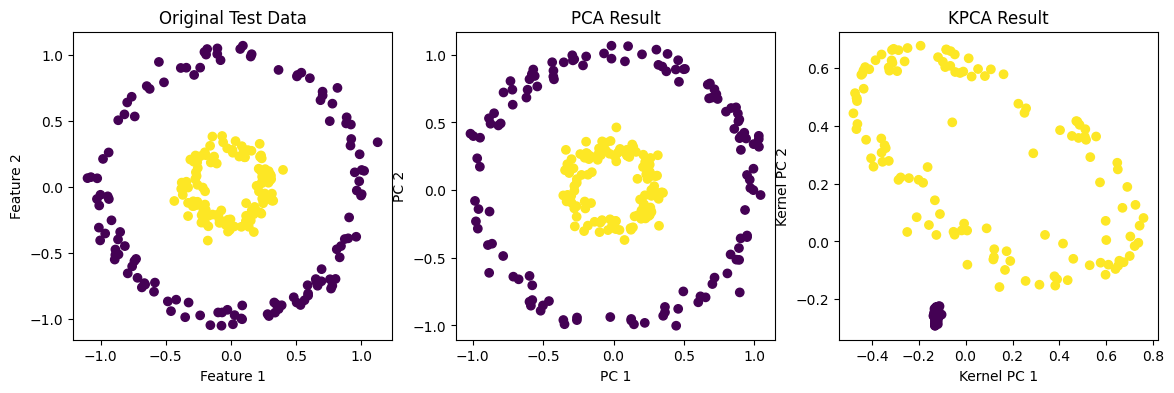

In [1]:
from sklearn.datasets import make_circles
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA, KernelPCA
import matplotlib.pyplot as plt

# Reference: https://scikit-learn.org/stable/auto_examples/decomposition/plot_kernel_pca.html

X, y = make_circles(n_samples=1000, factor=0.3, noise=0.05, random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=0)

pca = PCA(n_components=2)
kernel_pca = KernelPCA(kernel="rbf", gamma=10, fit_inverse_transform=True, alpha=0.1)

X_test_pca = pca.fit(X_train).transform(X_test)
X_test_kpca = kernel_pca.fit(X_train).transform(X_test)

plt.subplots(ncols=3, figsize=(14, 4))
plt.subplot(131)
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test)
plt.xlabel('Feature 1'), plt.ylabel('Feature 2')
plt.title('Original Test Data')
plt.subplot(132)
plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=y_test)
plt.xlabel('PC 1'), plt.ylabel('PC 2')
plt.title('PCA Result')
plt.subplot(133)
plt.scatter(X_test_kpca[:, 0], X_test_kpca[:, 1], c=y_test)
plt.xlabel('Kernel PC 1'), plt.ylabel('Kernel PC 2')
plt.title('KPCA Result')

## Two Moons Data

Text(0.5, 1.0, 'KPCA Result')

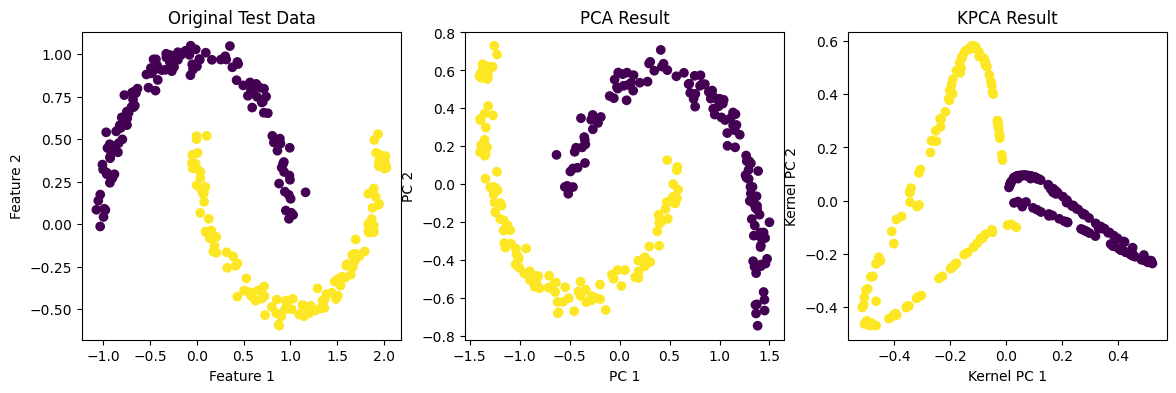

In [6]:
X, y = make_moons(noise=0.05, random_state=0, n_samples=1000)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=0)

pca = PCA(n_components=2)
kernel_pca = KernelPCA(kernel="rbf", gamma=10, fit_inverse_transform=True, alpha=0.1)

X_test_pca = pca.fit(X_train).transform(X_test)
X_test_kpca = kernel_pca.fit(X_train).transform(X_test)

plt.subplots(ncols=3, figsize=(14, 4))
plt.subplot(131)
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test)
plt.xlabel('Feature 1'), plt.ylabel('Feature 2')
plt.title('Original Test Data')
plt.subplot(132)
plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=y_test)
plt.xlabel('PC 1'), plt.ylabel('PC 2')
plt.title('PCA Result')
plt.subplot(133)
plt.scatter(X_test_kpca[:, 0], X_test_kpca[:, 1], c=y_test)
plt.xlabel('Kernel PC 1'), plt.ylabel('Kernel PC 2')
plt.title('KPCA Result')

In both cases, we demonstrate the capability of KPCA to find nonlinear structures in the data based solely on the relative positions of the samples (thanks to the RBF kernel that calculated their pairwise similarities). KPCA was able to separate the data with different patterns (as seen by their colors), whereas PCA was not able to. Take note that KPCA is an unsupervised learning technique, i.e. it does not know the colors of the samples at any time. But it was able to separate different circles from each other and different moons from each other. After a successful KPCA, a linear classifier is now sufficient to perform classification.